# Visualizing Single Cell DNA Methylation Data (Loyfer2023)

In [1]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
import PyComplexHeatmap
from PyComplexHeatmap import *

Read Loyfer2023 DNA methylation dataset (cell types level for cell type methylation signatures) <br>
Loyfer2023 DNA methylation dataset comes from PMID: 36599988

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/DingWB/PyComplexHeatmap/main/data/Loyfer2023.meth.csv",sep='\t',index_col=0)
df_row=pd.read_csv("https://raw.githubusercontent.com/DingWB/PyComplexHeatmap/main/data/Loyfer2023.meth.rows.csv",sep='\t',index_col=0)
df_col=pd.read_csv("https://raw.githubusercontent.com/DingWB/PyComplexHeatmap/main/data/Loyfer2023.meth.cols.csv",sep='\t',index_col=0)

In [3]:
data.head()

,Adipocytes,Bladder-Epithelium,Blood-B-Mem,Blood-B,Blood-Granulocytes,Colon-Macrophages,Liver-Macrophages,Blood-Monocytes,Lung-Interstitial-Macrophages,Lung-Alveolar-Macrophages,...,Pancreas-Duct,Skeletal-Muscle,Small-int-Epithelium,Small-int-Endocrine,Lung-Bronchus-Smooth-Muscle,Prostate-Smooth-Muscle,Bladder-Smooth-Muscle,Coronary-Artery-Smooth-Muscle,Aorta-Smooth-Muscle,Thyroid-Epithelium
chr1-110426397,0.120667,0.9102,0.8285,0.918667,0.750667,0.8705,0.896,0.916333,0.953333,0.9450,...,0.61225,0.5485,0.94175,0.952,0.417,0.150,0.229,0.294,0.214,0.938333
chr1-110426639,0.420000,0.9304,0.8920,0.955667,0.964667,0.9285,0.903,0.924667,0.975333,0.9720,...,0.94575,0.8990,0.96225,0.963,0.606,0.185,0.348,0.917,0.484,0.972333
chr1-110426659,0.425667,0.9328,0.7635,0.933000,0.942333,0.8945,0.931,0.963667,0.899333,0.8895,...,0.93875,0.8390,0.92225,0.903,0.559,0.129,0.292,0.875,0.395,0.989667
chr1-110427109,0.203667,0.9724,0.9610,0.963667,0.968667,0.9240,0.939,0.985000,0.968667,0.9620,...,0.73300,0.7570,0.96525,0.939,0.929,0.225,0.806,0.951,0.905,0.974333
chr1-110427116,0.217333,0.9478,1.0000,0.976000,0.970667,0.9730,0.913,0.975000,0.970333,0.9800,...,0.65125,0.7955,0.96150,1.000,0.952,0.605,0.857,1.000,0.868,0.981000


In [4]:
df_row.head()

,Group
ID,
chr1-110426397,Adipocytes
chr1-110426639,Adipocytes
chr1-110426659,Adipocytes
chr1-110427109,Adipocytes
chr1-110427116,Adipocytes


In [5]:
df_col.head()

,Group
ClusterID,
Adipocytes,Adipocytes
Bladder-Epithelium,Bladder-Ep
Blood-B-Mem,Blood-B
Blood-B,Blood-B
Blood-Granulocytes,Blood-Granul


In [6]:
df_col.Group.unique()

array(['Adipocytes', 'Bladder-Ep', 'Blood-B', 'Blood-Granul',
       'Blood-Mono+Macro', 'Blood-NK', 'Blood-T', 'Bone-Osteob',
       'Breast-Basal-Ep', 'Breast-Luminal-Ep', 'Colon-Ep', 'Dermal-Fibro',
       'Epid-Kerat', 'Eryth-prog', 'Fallopian-Ep', 'Gallbladder',
       'Gastric-Ep', 'Head-Neck-Ep', 'Heart-Cardio', 'Heart-Fibro',
       'Kidney-Ep', 'Liver-Hep', 'Lung-Ep-Alveo', 'Lung-Ep-Bron',
       'Neuron', 'Oligodend', 'Pancreas-Acinar', 'Pancreas-Beta',
       'Pancreas-Delta', 'Pancreas-Duct', 'Skeletal-Musc', 'Small-Int-Ep',
       'Smooth-Musc', 'Thyroid-Ep'], dtype=object)

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


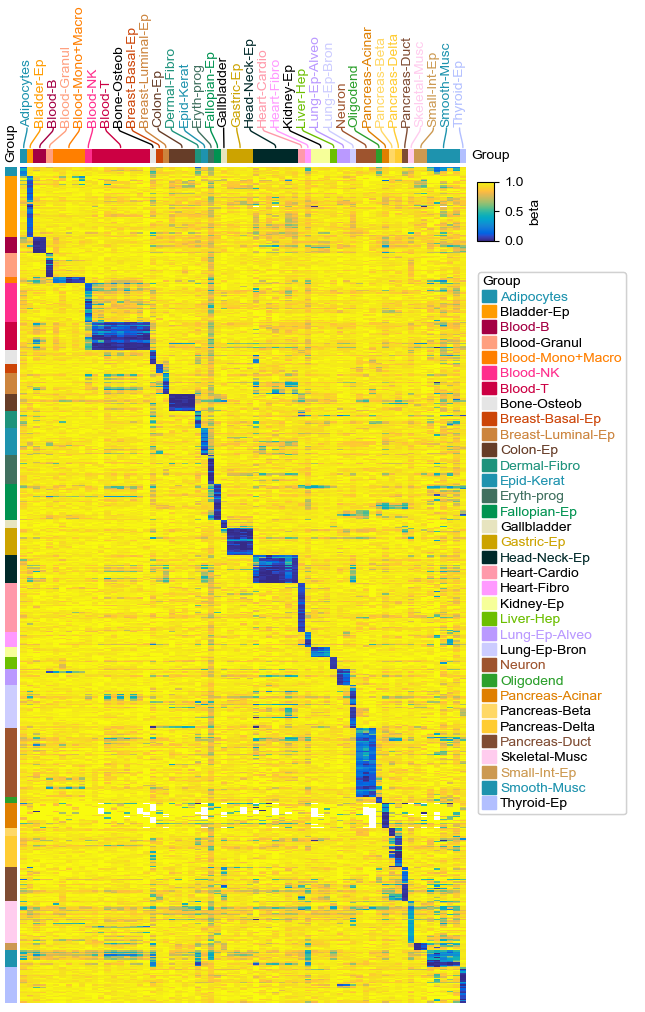

In [7]:
col_colors_dict={
                'Adipocytes':'#1E93AE','Bladder-Ep':'#FF9C00','Blood-B':'#A40043','Blood-Granul':'#FF9F7F',
                'Blood-Mono+Macro':'#FF7F00','Blood-NK':'#FF2E8D','Blood-T':'#CC0043','Bone-Osteob':'#E5E5E5',
                'Breast-Basal-Ep':'#CC4407','Breast-Luminal-Ep':'#CC843D','Colon-Ep':'#663D28','Dermal-Fibro':'#1E937C',
                'Epid-Kerat':'#1E93AE','Eryth-prog':'#40705F','Fallopian-Ep':'#009351','Gallbladder':'#E7E4BF',
                'Gastric-Ep':'#CCA300','Head-Neck-Ep':'#002929','Heart-Cardio':'#FF99AA','Heart-Fibro':'#FF99FF',
                'Kidney-Ep':'#F6FF99','Liver-Hep':'#6CBF00','Lung-Ep-Alveo':'#BA99FF','Lung-Ep-Bron':'#CCCCFF',
                'Neuron':'#9e542e','Oligodend':'#2ca02c','Pancreas-Acinar':'#DF7F00','Pancreas-Beta':'#FFD866',
                'Pancreas-Delta':'#FFCC32','Pancreas-Duct':'#7F4C33','Skeletal-Musc':'#FFCCEE','Small-Int-Ep':'#CC9951',
                'Smooth-Musc':'#1E93AE','Thyroid-Ep':'#B2BFFF'}

col_ha = HeatmapAnnotation(label=anno_label(df_col['Group'],merge=True,rotation=90,extend=True,
                                            colors=col_colors_dict,adjust_color=True,luminance=0.75,
                                            relpos=(0.5,0)), #fontsize=10
                           Group=anno_simple(df_col['Group'],colors=col_colors_dict), #legend_kws={'fontsize':4}
                           verbose=0,axis=1)
row_ha = HeatmapAnnotation(
                           Group=anno_simple(df_row['Group'],legend=True,
                                             colors=col_ha.annotations[1].color_dict),
                           verbose=0,axis=0,plot_legend=False) #label_kws={'rotation':90,'rotation_mode':'anchor','color':'black'}

plt.figure(figsize=(6, 10))
cm = ClusterMapPlotter(data=data.loc[df_row.index.tolist(),df_col.index.tolist()],
                       top_annotation=col_ha, left_annotation=row_ha,
                       row_cluster=False,col_cluster=False,
                       label='beta', row_dendrogram=False,legend_gap=7,
                       cmap='parula',rasterized=True)
plt.savefig("Loyfer2023_heatmap.pdf",bbox_inches='tight')
plt.show()